In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test['Parch']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: Parch, Length: 418, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    daf = pd.DataFrame([survived,dead])
    daf.index = ['Survived','Dead']
    daf.plot(kind='bar',stacked=True, figsize=(10,5))

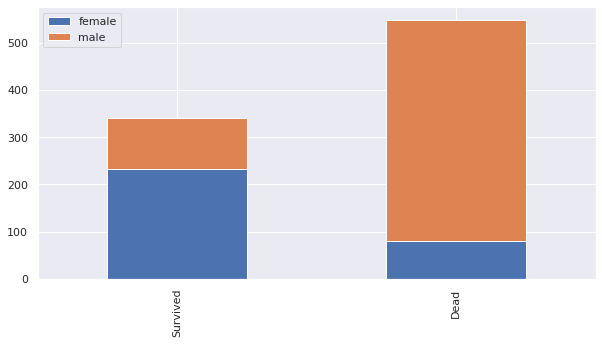

In [8]:
bar_chart('Sex')

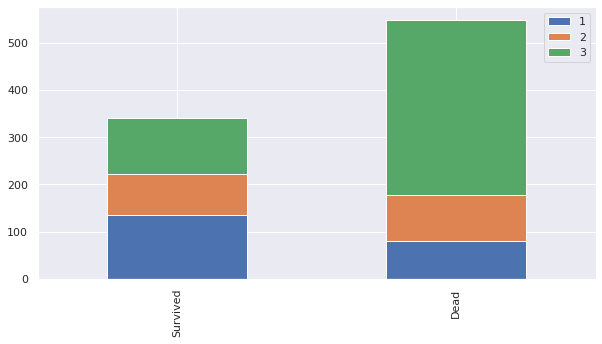

In [9]:
bar_chart('Pclass')

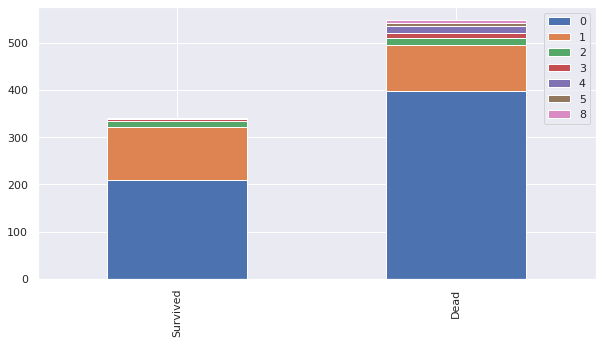

In [10]:
bar_chart('SibSp')

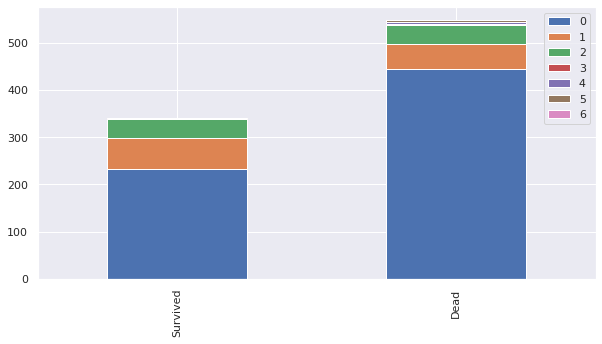

In [11]:
bar_chart('Parch')

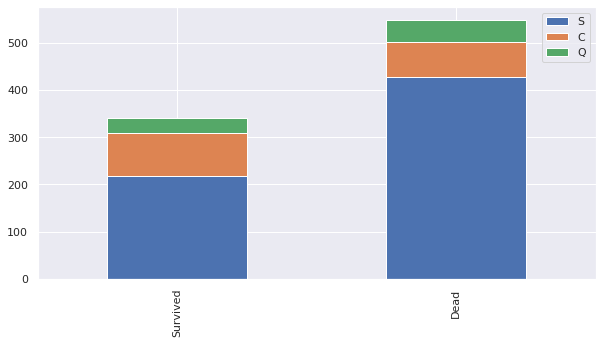

In [12]:
bar_chart('Embarked')

# Reference
#### https://www.youtube.com/watch?v=COUWKVf6zKY
#### https://www.youtube.com/watch?v=GXWBzcAzjoQ

## Categorical Feature
Pclass\
Name\
Sex\
SibSp\
Parch\
Embarked\
Cabin

In [13]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [15]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

## Mapping
#### Name 
Mr : 0 \
Miss : 1 \
Mrs  : 2 \
Master : 3 \
Others : 4 
#### Sex
Male : 0\
Female : 0

In [16]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


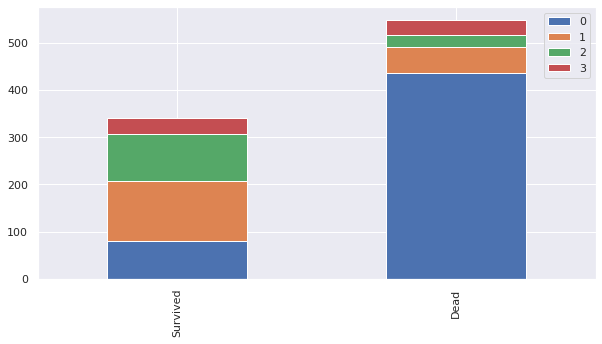

In [19]:
bar_chart('Title')

In [20]:
# df = df.drop(['Name'],axis=1)
# test = test.drop(['Name'], axis =1)

In [21]:
# df['Sex'] = df['Sex'].map({'male':0,'female':1})
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [22]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [23]:
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [24]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

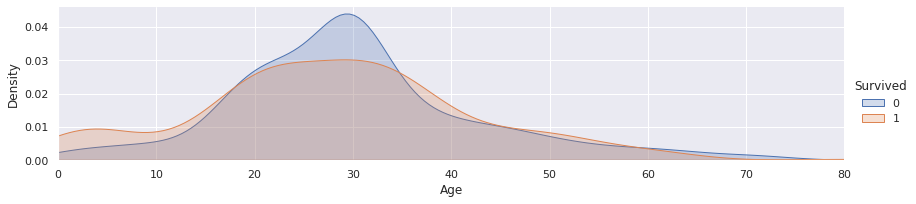

In [25]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

<AxesSubplot:>

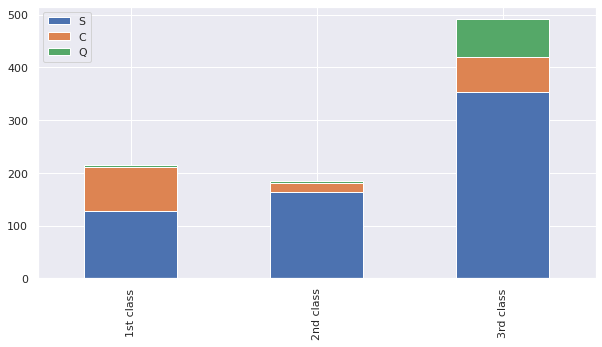

In [26]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
daf = pd.DataFrame([Pclass1, Pclass2, Pclass3])
daf.index = ['1st class','2nd class', '3rd class']
daf.plot(kind='bar',stacked=True, figsize=(10,5))

In [27]:
#  df['Embarked'] = df['Embarked'].fillna('S')
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [28]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

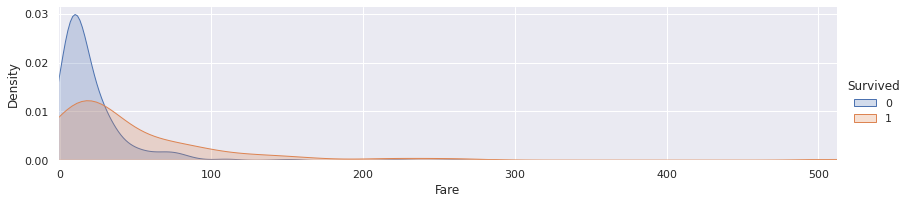

In [29]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(-1, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [30]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

<AxesSubplot:>

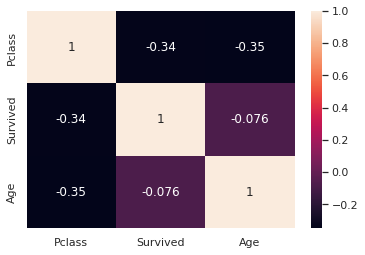

In [41]:
sns.heatmap(train[['Pclass','Survived','Age']].corr(),annot=True)

In [ ]:
# for dataset in train_test_data:
#     dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
#     dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
#     dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
#     dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
for df in train_test_data:
    df['Fare'] = np.where(df['Fare'] <= 17, 0, df['Fare'])
    df['Fare'] = np.where(df['Fare'].between(17,30), 1, df['Fare'])
    df['Fare'] = np.where(df['Fare'].between(30,100), 2, df['Fare'])
    df['Fare'] = np.where(df['Fare']>100, 3, df['Fare'])

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Parch',shade= True)
facet.set(xlim=(-1, train['Parch'].max()))
facet.add_legend()
 
plt.show()  

In [ ]:
train['Parch'].value_counts()

In [ ]:
# test[['Parch']] = test[['Parch']].astype(int)

In [ ]:
test['Parch'].value_counts()

In [ ]:
# df['Parch'] = df['Parch'].map({0:0,1:1,2:2,3:3,4:3,5:3,6:3})
Parch_mapping = {0:0,1:1,2:2,3:3,4:3,5:3,6:3,7:3,8:3,9:3}
# for dataset in train_test_data:
#     dataset['Parch'] = dataset['Parch'].map(Parch_mapping)

test['Parch'] = test['Parch'].map(Parch_mapping)
train['Parch'] = train['Parch'].map(Parch_mapping)

In [ ]:
test['Parch']

In [ ]:
train['Parch']

In [ ]:
train['SibSp'].value_counts()

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'SibSp',shade= True)
facet.set(xlim=(-1, train['SibSp'].max()))
facet.add_legend()
 
plt.show()  

In [ ]:
# df['SibSp'] = df['SibSp'].map({0:0,1:1,2:2,3:3,4:3,5:3,6:3,7:3,8:3})
# df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
for dataset in train_test_data:
    dataset['SibSp'] = dataset['SibSp'].map({0:0,1:1,2:2,3:3,4:3,5:3,6:3,7:3,8:3})

In [ ]:
test.info()

In [ ]:
train.info()

In [ ]:
train['Cabin'].value_counts()

In [ ]:
train['Cabin'] = train['Cabin'].str[:1]

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
daf = pd.DataFrame([Pclass1, Pclass2, Pclass3])
daf.index = ['1st class','2nd class', '3rd class']
daf.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
train['Cabin'] = train['Cabin'].map({"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8})

In [ ]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
   
# train['Age'] = np.where(train['Age'] <= 16, 0, df['Age'])
# train['Age'] = np.where(train['Age'].between(16,26), 1, df['Age'])
# train['Age'] = np.where(train['Age'].between(26,36), 2, df['Age'])
# train['Age'] = np.where(train['Age'].between(26,36), 3, df['Age'])
# train['Age'] = np.where(train['Fare']>62, 4, df['Age'])
train

In [ ]:
# df = df.drop(['PassengerId','Ticket','Carbin'], axis=1)
features_drop = ['Ticket', 'Cabin', 'Name']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [ ]:
type(train['Parch'][0])

In [ ]:
type(test['Parch'][0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
train.info()

In [ ]:
train.head()

In [ ]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

## 1. kNN

In [ ]:
reg = KNeighborsClassifier()
score = cross_val_score(reg, train_data, target, cv=k_fold, scoring='accuracy')
print(score)

In [ ]:
# kNN Score
round(np.mean(score)*100, 2)

## 2. DecisionTree

In [ ]:
reg = DecisionTreeClassifier()
score = cross_val_score(reg, train_data, target, cv=k_fold, scoring='accuracy')
print(score)

In [ ]:
round(np.mean(score)*100, 2)

## 3. RandomForest

In [ ]:
reg = RandomForestClassifier()
score = cross_val_score(reg, train_data, target, cv=k_fold,scoring='accuracy')
print(score)

In [ ]:
round(np.mean(score)*100, 2)

## 4. NaiveBayes

In [ ]:
reg = GaussianNB()
score = cross_val_score(reg, train_data, target, cv=k_fold,n_jobs=1, scoring='accuracy')
print(score)

In [ ]:
round(np.mean(score)*100, 2)

## 5. SVM

In [ ]:
reg = SVC()
score = cross_val_score(reg, train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

In [ ]:
round(np.mean(score)*100, 2)

## Testing

In [ ]:
reg = DecisionTreeClassifier()
reg.fit(train_data, target)



In [ ]:
test_data = test.drop("PassengerId", axis=1).copy()

In [ ]:
test_data = test.drop("PassengerId", axis=1).copy()

In [ ]:
test_data.isna().sum()

In [ ]:
prediction = reg.predict(test_data)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()